In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_tokyo = pd.read_csv('Airbnb Tokyo.csv')

In [5]:
data_tokyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6371 entries, 0 to 6370
Data columns (total 13 columns):
Unnamed: 0              6371 non-null int64
room_id                 6371 non-null int64
host_id                 6371 non-null int64
room_type               6371 non-null object
reviews                 4204 non-null float64
overall_satisfaction    5099 non-null float64
accommodates            5237 non-null float64
bedrooms                6361 non-null float64
bathrooms               6343 non-null float64
price                   6371 non-null int64
minstay                 5885 non-null float64
latitude                6371 non-null float64
longitude               6371 non-null float64
dtypes: float64(8), int64(4), object(1)
memory usage: 647.2+ KB


In [6]:
drop_data = ["Unnamed: 0",'room_id','host_id', 'reviews']
data_tokyo.drop(drop_data,axis = 1,inplace = True)

In [7]:
data_tokyo.dropna(axis = 0, inplace = True)
data_tokyo.reset_index(drop = True,inplace = True)

In [8]:
from sklearn.preprocessing import OneHotEncoder

roomtype = data_tokyo[['room_type']]
encoder = OneHotEncoder()
roomtype = encoder.fit_transform(roomtype)
roomtype.toarray()

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [9]:
roomtype = pd.DataFrame(columns = encoder.categories_[0],data = roomtype.toarray())

In [10]:
value = data_tokyo[['price']]
data_tokyo.drop(['price','room_type'],axis = 1 , inplace = True)

In [11]:
data = pd.concat([data_tokyo,roomtype,value], axis = 1)

price Max:  2632


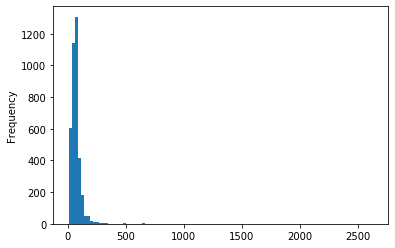

In [12]:
data['price'].plot(kind = 'hist',bins =100)
print('price Max: ',data['price'].max())

In [13]:
data['group'] = pd.cut(x= data['price'],
                      bins = [0,50,100,150,200,500,2632],
                      labels = ['group_1','group_2','group_3','group_4','group_5','group_6'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 12 columns):
overall_satisfaction    3810 non-null float64
accommodates            3810 non-null float64
bedrooms                3810 non-null float64
bathrooms               3810 non-null float64
minstay                 3810 non-null float64
latitude                3810 non-null float64
longitude               3810 non-null float64
Entire home/apt         3810 non-null float64
Private room            3810 non-null float64
Shared room             3810 non-null float64
price                   3810 non-null int64
group                   3810 non-null category
dtypes: category(1), float64(10), int64(1)
memory usage: 331.5 KB


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state=42)
for train_index, test_index in split.split(data,data['group']):
    train = data.loc[train_index]
    test = data.loc[test_index]

In [15]:
for train_val_index, valid_index in split.split(train,train['group']):
    train_val = data.loc[train_val_index]
    valid = data.loc[valid_index]

In [16]:
train.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)

In [17]:
train_val.reset_index(drop = True, inplace = True)
valid.reset_index(drop = True, inplace = True)

In [18]:
train.drop('group',axis = 1,inplace = True)
test.drop('group',axis = 1,inplace = True)
train_val.drop('group',axis = 1,inplace = True)
valid.drop('group',axis = 1,inplace = True)

In [19]:
train_y = train[['price']]
train_X = train.drop(['price','overall_satisfaction'], axis = 1)

test_y = test[['price']]
test_X = test.drop(['price','overall_satisfaction'], axis = 1)

train_val_y = train_val[['price']]
train_val_X = train_val.drop(['price','overall_satisfaction'], axis = 1)

valid_y = valid[['price']]
valid_X = valid.drop(['price','overall_satisfaction'], axis = 1)

In [20]:
train_X.to_csv('Tk_train_X.csv',header = True, index = False)
train_y.to_csv('Tk_train_y.csv',header = True, index = False)
test_X.to_csv('Tk_test_X.csv',header = True, index = False)
test_y.to_csv('Tk_test_y.csv',header = True, index = False)

train_val_X.to_csv('Tk_train_val_X.csv',header = True, index = False)
train_val_y.to_csv('Tk_train_val_y.csv',header = True, index = False)
valid_X.to_csv('Tk_valid_X.csv',header = True, index = False)
valid_y.to_csv('Tk_valid_y.csv',header = True, index = False)

In [21]:
valid_X

,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room
0,1.0,1.0,1.0,1.0,35.712907,139.747074,0.0,0.0,1.0
1,2.0,1.0,1.0,3.0,35.731418,139.709628,1.0,0.0,0.0
2,3.0,0.0,1.0,3.0,35.652437,139.756792,1.0,0.0,0.0
3,3.0,1.0,1.0,3.0,35.663169,139.695878,1.0,0.0,0.0
4,2.0,1.0,2.0,1.0,35.681957,139.679822,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
605,5.0,1.0,1.0,2.0,35.623813,139.753089,1.0,0.0,0.0
606,2.0,1.0,1.0,5.0,35.661495,139.657729,0.0,1.0,0.0
607,3.0,1.0,1.0,2.0,35.704619,139.720320,0.0,1.0,0.0
608,3.0,1.0,1.0,2.0,35.658473,139.695881,1.0,0.0,0.0


In [22]:
train_X

,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room
0,2.0,1.0,1.0,2.0,35.563529,139.693280,1.0,0.0,0.0
1,5.0,1.0,1.5,1.0,35.625558,139.624747,1.0,0.0,0.0
2,1.0,1.0,1.0,1.0,35.669902,139.721586,0.0,1.0,0.0
3,3.0,1.0,1.0,3.0,35.683800,139.696355,1.0,0.0,0.0
4,4.0,1.0,7.5,1.0,35.727562,139.709300,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
3043,2.0,1.0,1.0,1.0,35.644764,139.717303,0.0,1.0,0.0
3044,2.0,0.0,1.0,1.0,35.691213,139.766121,1.0,0.0,0.0
3045,2.0,1.0,1.0,2.0,35.731612,139.728195,0.0,1.0,0.0
3046,5.0,1.0,1.0,1.0,35.676228,139.704050,1.0,0.0,0.0


In [23]:
train_val_X

,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room
0,1.0,1.0,1.0,14.0,35.680265,139.661080,0.0,1.0,0.0
1,2.0,1.0,1.0,1.0,35.648584,139.752135,1.0,0.0,0.0
2,4.0,0.0,1.0,2.0,35.686209,139.697698,1.0,0.0,0.0
3,4.0,1.0,1.0,2.0,35.695258,139.778625,1.0,0.0,0.0
4,3.0,2.0,1.0,2.0,35.692706,139.702920,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2433,2.0,1.0,1.0,2.0,35.690370,139.711497,1.0,0.0,0.0
2434,1.0,1.0,1.0,1.0,35.573990,139.708877,0.0,0.0,1.0
2435,2.0,1.0,1.0,2.0,35.698255,139.782276,0.0,1.0,0.0
2436,2.0,1.0,1.0,3.0,35.738395,139.720035,1.0,0.0,0.0


In [24]:
test_X

,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room
0,2.0,1.0,1.0,1.0,35.698040,139.686913,0.0,1.0,0.0
1,1.0,1.0,1.0,1.0,35.725171,139.588377,0.0,1.0,0.0
2,4.0,1.0,1.0,1.0,35.653090,139.706398,1.0,0.0,0.0
3,2.0,1.0,1.0,1.0,35.659440,139.722276,0.0,1.0,0.0
4,2.0,1.0,1.0,3.0,35.696706,139.707153,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
757,4.0,1.0,1.0,2.0,35.694833,139.816468,0.0,1.0,0.0
758,2.0,1.0,1.0,1.0,35.656425,139.870544,0.0,0.0,1.0
759,1.0,1.0,1.0,1.0,35.613725,139.720963,0.0,1.0,0.0
760,2.0,1.0,1.0,4.0,35.667563,139.634776,1.0,0.0,0.0
